In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [2]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(60000, 785)

In [4]:
test.shape

(10000, 785)

In [5]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

In [6]:
X_train = X_train/255

In [7]:
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values
X_test = X_test/255

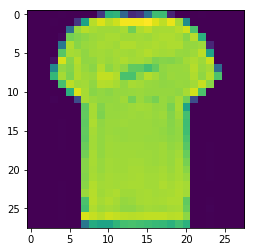

In [8]:
# Let's see the image look like
image = X_train[10, :].reshape((28,28))
plt.imshow(image)
plt.show()

In [9]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [16]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
# Let's build the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
model = Sequential()

In [18]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [21]:
# Let's Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.5772 - acc: 0.7862 - val_loss: 0.3690 - val_acc: 0.8691
Epoch 2/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.3944 - acc: 0.8553 - val_loss: 0.3218 - val_acc: 0.8775
Epoch 3/10
60000/60000 [==============================] - 215s 4ms/step - loss: 0.3476 - acc: 0.8749 - val_loss: 0.2810 - val_acc: 0.8959
Epoch 4/10
60000/60000 [==============================] - 227s 4ms/step - loss: 0.3194 - acc: 0.8828 - val_loss: 0.2549 - val_acc: 0.9022
Epoch 5/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.2976 - acc: 0.8911 - val_loss: 0.2461 - val_acc: 0.9071
Epoch 6/10
60000/60000 [==============================] - 224s 4ms/step - loss: 0.2823 - acc: 0.8966 - val_loss: 0.2369 - val_acc: 0.9124
Epoch 7/10
60000/60000 [==============================] - 228s 4ms/step - loss: 0.2665 - acc: 0.9009 - val_loss: 0.2338 - 

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([[  9.21456993e-01,   7.09636296e-08,   5.09984020e-05, ...,
          2.46155457e-10,   1.76758986e-05,   1.07728937e-09],
       [  1.12452610e-10,   1.00000000e+00,   2.65792915e-10, ...,
          5.96660490e-16,   2.95910865e-12,   8.44461276e-17],
       [  5.58947884e-02,   1.02332922e-06,   7.32018113e-01, ...,
          2.70776646e-09,   2.21668306e-05,   9.50897245e-08],
       ..., 
       [  2.97420699e-11,   1.19230920e-15,   3.34196776e-12, ...,
          1.04778423e-13,   1.00000000e+00,   5.41424815e-14],
       [  4.14071791e-03,   3.83850536e-04,   5.50264376e-04, ...,
          8.01871556e-06,   9.85845566e-01,   1.71389747e-05],
       [  3.21931997e-03,   9.34494436e-01,   5.34685096e-03, ...,
          4.90953198e-07,   6.69270987e-03,   1.20777747e-06]], dtype=float32)

In [25]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_class, y_pred_class)

In [27]:
cm

array([[894,   3,  11,   8,   1,   1,  77,   0,   5,   0],
       [  1, 991,   1,   5,   0,   0,   2,   0,   0,   0],
       [ 19,   1, 828,   7,  72,   0,  71,   0,   2,   0],
       [ 22,   5,   5, 930,  20,   0,  16,   0,   2,   0],
       [  1,   0,  24,  19, 890,   0,  64,   0,   2,   0],
       [  0,   1,   0,   0,   0, 980,   0,  14,   1,   4],
       [127,   3,  43,  19,  57,   0, 747,   0,   4,   0],
       [  0,   0,   0,   0,   0,   9,   0, 977,   0,  14],
       [  2,   1,   0,   1,   2,   0,   5,   1, 988,   0],
       [  0,   0,   0,   0,   0,   4,   0,  45,   0, 951]])

In [28]:
accuracy_score(y_test_class, y_pred_class)*100

91.759999999999991